In [1]:
###Data Exploration and Cleanup

#Component: "api_component.py"
'''
While stock datasets are available from Quandl/Kaggle, 
the former is limited in nature (for the free datasets), and 
the latter is already scrubbed and cleaned in advance. Stock data
from Google Finance and Yahoo Maps APIs are both no longer available.

Alphavantage offers a free API key with lifetime access,
and relatively few restrictions compared to other available stock
data resources. 

Apple stock ticker and API key passed as request to the Alphavantage API:
'''
stock_ticker = "AAPL"
target_url = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol="+stock_ticker+"&outputsize=full&apikey="+api_key
target_url_rsi = "https://www.alphavantage.co/query?function=RSI&symbol="+stock_ticker+"&interval=daily&time_period=60&series_type=close&apikey="+api_key
'''
Additionally, the Alphavantage API allows the pulling of technical indicator 
data in addition to price data for a specific stock and specified timeframe.

Price and RSI data for Apple was requested via the API and stored in three ways:
1. a raw JSON object (for debugging and retrival)
2. a dataframe object (for data manipulation and verification)
3. a CSV file (for retrival)

Cleaning up the data, going from JSON -> DATAFRAME -> CSV, the timestamp column 
was converted to a datetime type and then datetime format for parsing. This was 
done for both price data and RSI data for Apple stock. the .to_csv("date_format="%Y-%m-%d") 
was essential in allowing data parsing by date for visualization.
'''
df['timestamp'] = df['timestamp'].astype('datetime64[ns]')
df.to_csv("apple_raw.csv",date_format="%Y-%m-%d",index = False)

df_rsi['timestamp'] = df_rsi['timestamp'].astype('datetime64[ns]')
df_rsi.to_csv("apple_raw_rsi.csv",date_format="%Y-%m-%d",index = False)
'''
Raw JSON responses were saved to file to avoid redundant API requests, and for data verification:
'''
json.dump(apple_raw_rsi, outfile,indent=4, sort_keys=True)
json.dump(apple_raw_rsi, outfile,indent=4, sort_keys=True)
'''


In [ ]:
###Final Data Analysis

In [2]:
###Component: api_component.py

#Imports

import pandas as pd
from pandas.io.json import json_normalize
import numpy as np
from matplotlib import pyplot as plt
import json
import requests 
import csv
import os.path

###API request (price data and RSI)

#Load API key:
if os.path.isfile("untracked_api_key.txt") == True:
	with open('untracked_api_key.txt', 'r') as file_object:
		#Text document that is untracked in project-one directory (NOT pushed to git) with API key
		#Create a file called untracked_api_key.txt with your key and DO NOT add to git when commiting or pushing changes
		api_key = file_object.readline()
elif os.path.isfile("untracked_api_key.txt") == False:
	print("untracked_api_key.txt not in directory; please provide API key in a file named untracked_api_key.txt in the same directory.")

stock_ticker = "AAPL"

#Check if apple_raw and apple_raw.csv exists (i.e. do not run API request if request already completed/files are present)
if os.path.isfile("apple_raw") == False or os.path.isfile("apple_raw.csv") == False:
	
	#API request (price data)
	target_url = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol="+stock_ticker+"&outputsize=full&apikey="+api_key
	
	print("API request: " + target_url)
	apple_raw = requests.get(target_url).json()

	#Save JSON response to file
	with open('apple_raw','w+') as outfile:
		json.dump(apple_raw, outfile,indent=4, sort_keys=True)

	#Save JSON response to CSV
	df = pd.DataFrame.from_dict(apple_raw["Time Series (Daily)"], orient='index')
	df.reset_index(inplace=True)
	df = df.rename(columns={"index":"timestamp","1. open":"open","2. high":"high","3. low":"low","4. close":"close","5. volume":"volume"})
	df['timestamp'] = df['timestamp'].astype('datetime64[ns]')
	df.to_csv("apple_raw.csv",date_format="%Y-%m-%d",index = False)

#Check if apple_raw_rsi and apple_raw_rsi.csv exists
if os.path.isfile("apple_raw_rsi") == False or os.path.isfile("apple_raw_rsi.csv") == False:

	#API request (RSI data for close price)
	target_url_rsi = "https://www.alphavantage.co/query?function=RSI&symbol="+stock_ticker+"&interval=daily&time_period=60&series_type=close&apikey="+api_key
	print("API request: " + target_url_rsi)

	apple_raw_rsi = requests.get(target_url_rsi).json()

	#Save JSON response to file
	with open('apple_raw_rsi','w+') as outfile:
		json.dump(apple_raw_rsi, outfile,indent=4, sort_keys=True)

	#Save JSON response to CSV
	df_rsi = pd.DataFrame.from_dict(apple_raw_rsi["Technical Analysis: RSI"], orient='index')
	df_rsi.reset_index(inplace=True)
	df_rsi = df_rsi.rename(columns={"index":"timestamp"})
	df_rsi['timestamp'] = df_rsi['timestamp'].astype('datetime64[ns]')
	df_rsi.to_csv("apple_raw_rsi.csv",date_format="%Y-%m-%d",index = False)

###Parse data

###Check data for errors/missing datapoints

###Visualize data

###Data analysis



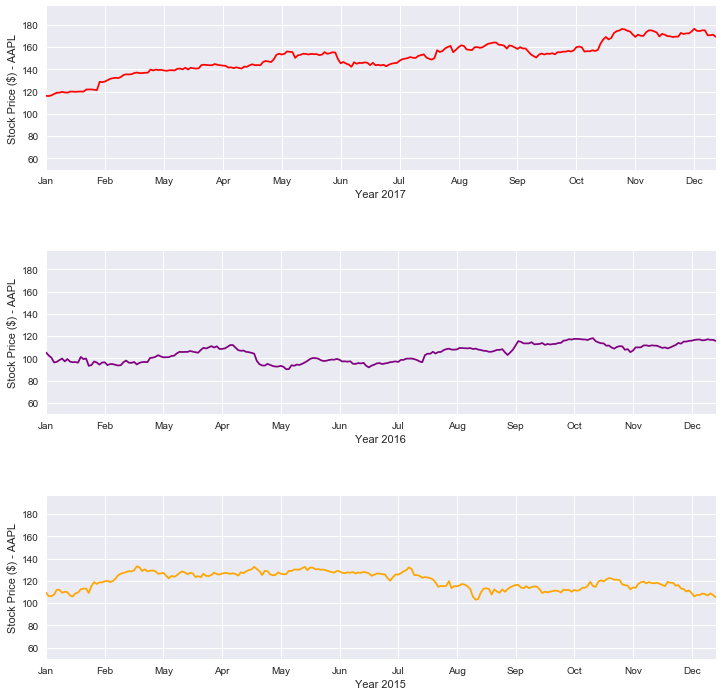

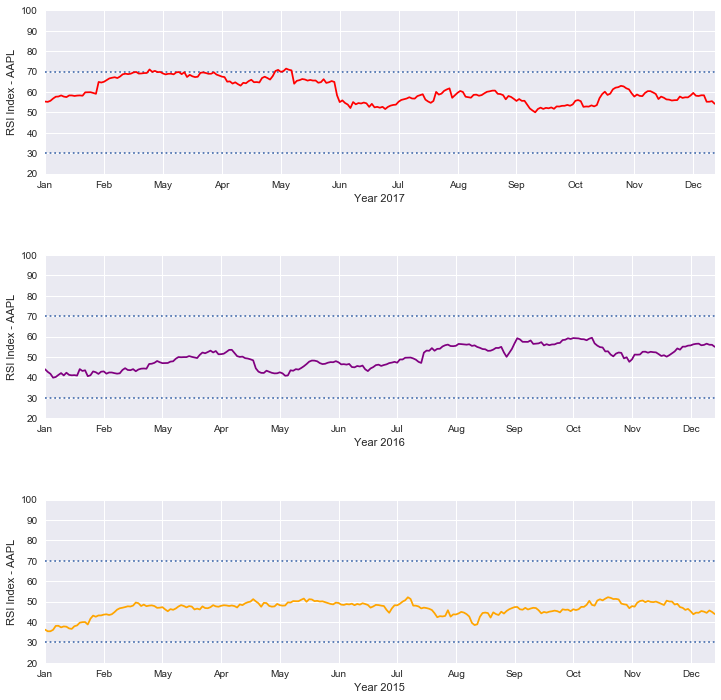

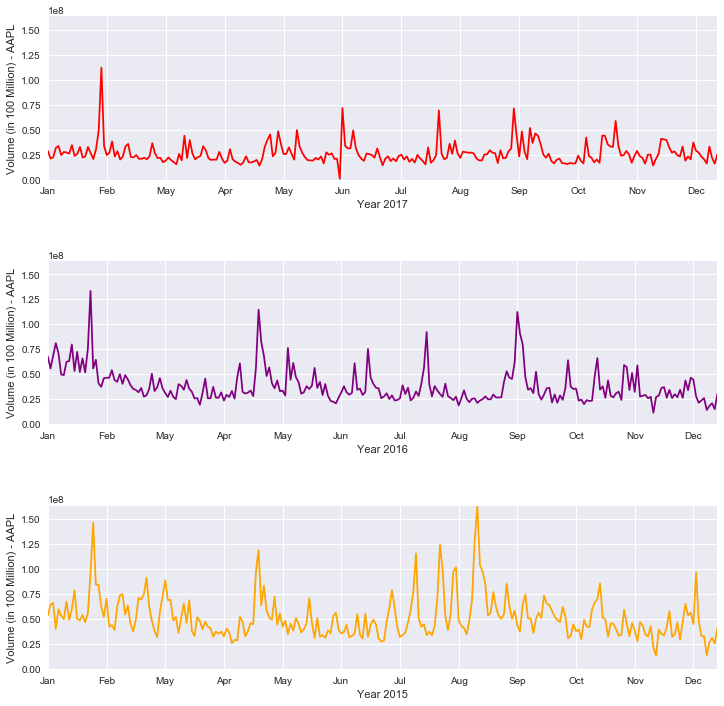

In [1]:
#### Component:main.py

#Imports
import pandas as pd
import matplotlib.pyplot as pp
import seaborn
import numpy as np
import matplotlib.dates as mdate

import datetime as dt

from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

#Parse data
stock_pd = pd.read_csv("apple_raw.csv")
rsi_pd = pd.read_csv("apple_raw_rsi.csv")
#stock_pd = pd.read_csv("daily_MSFT.csv")
stock_pd.head()

stock_pd1 = stock_pd.sort_values(by='timestamp')
stock_pd1.set_index('timestamp', inplace=True)
stock_pd2 = stock_pd.sort_values(by='timestamp')
stock_pd2.set_index('timestamp', inplace=True)
stock_pd3 = stock_pd.sort_values(by='timestamp')
stock_pd3.set_index('timestamp', inplace=True)

rsi_pd1 = rsi_pd.sort_values(by='timestamp')
rsi_pd1.set_index('timestamp', inplace=True)
rsi_pd2 = rsi_pd.sort_values(by='timestamp')
rsi_pd2.set_index('timestamp', inplace=True)
rsi_pd3 = rsi_pd.sort_values(by='timestamp')
rsi_pd3.set_index('timestamp', inplace=True)

#print(stock_pd)

month_ticks = ("Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec")
#x_pos = [i for i, _ in enumerate(month_ticks)]
#x_pos=[0,25,50,75,100,250,150,175,200,250,200,220]
x_pos = np.arange(0,300,22,dtype=None)

#try:

##  STOCK Closing Price Chart
max_closing = stock_pd1.truncate(before=str('2017-01-01'), after=str('2017-12-31'))["close"].max() + 20

pp.subplot(3,1,1)
pp.ylim(50,max_closing)
pp.ylabel("Stock Price ($) - " + "AAPL")

pp.xticks(x_pos, month_ticks)

stock_pd1.truncate(before=str('2017-01-01'), after=str('2017-12-31'))['close'].plot(figsize=(12,12), color="red")

pp.subplot(3,1,2)
pp.ylim(50,max_closing)
pp.ylabel("Stock Price ($) - " + "AAPL")
pp.xticks(x_pos, month_ticks)
stock_pd2.truncate(before=str('2016-01-01'), after=str('2016-12-31'))['close'].plot(figsize=(12,12), color="purple")

pp.subplot(3,1,3)
pp.ylim(50,max_closing)
pp.ylabel("Stock Price ($) - " + "AAPL")
pp.xticks(x_pos, month_ticks)
stock_pd3.truncate(before=str('2015-01-01'), after=str('2015-12-31'))['close'].plot(figsize=(12,12), color="orange")

pp.subplots_adjust(hspace=0.5)

ax = pp.subplot(3,1,1)
ax.set_xlabel('Year 2017')
labels = [item.get_text() for item in ax.get_xticklabels()]

labels[0] = 'Jan'
labels[1] = 'Feb'
labels[2] = 'May'
labels[3] = 'Apr'
labels[4] = 'May'
labels[5] = 'Jun'
labels[6] = 'Jul'
labels[7] = 'Aug'
labels[8] = 'Sep'
labels[9] = 'Oct'
labels[10] = 'Nov'
labels[11] = 'Dec'

ax.set_xticklabels(labels)


ax = pp.subplot(3,1,2)
ax.set_xlabel('Year 2016')
labels = [item.get_text() for item in ax.get_xticklabels()]

labels[0] = 'Jan'
labels[1] = 'Feb'
labels[2] = 'May'
labels[3] = 'Apr'
labels[4] = 'May'
labels[5] = 'Jun'
labels[6] = 'Jul'
labels[7] = 'Aug'
labels[8] = 'Sep'
labels[9] = 'Oct'
labels[10] = 'Nov'
labels[11] = 'Dec'

ax.set_xticklabels(labels)

ax = pp.subplot(3,1,3)
ax.set_xlabel('Year 2015')
labels = [item.get_text() for item in ax.get_xticklabels()]

labels[0] = 'Jan'
labels[1] = 'Feb'
labels[2] = 'May'
labels[3] = 'Apr'
labels[4] = 'May'
labels[5] = 'Jun'
labels[6] = 'Jul'
labels[7] = 'Aug'
labels[8] = 'Sep'
labels[9] = 'Oct'
labels[10] = 'Nov'
labels[11] = 'Dec'

ax.set_xticklabels(labels)
pp.savefig('2015-2017 Apple close price.png')
pp.show()

###############
## RSI Chart
###############

pp.subplot(3,1,1)
pp.ylim(20,100)
pp.axhline(y=30, linestyle =':')
pp.axhline(y=70, linestyle =':')
pp.ylabel("RSI Index - " + "AAPL")
pp.xticks(x_pos, month_ticks)
rsi_pd1.truncate(before=str('2017-01-01'), after=str('2017-12-31'))['RSI'].plot(figsize=(12,12), color="red")

pp.subplot(3,1,2)
pp.ylim(20,100)
pp.axhline(y=30,linestyle =':')
pp.axhline(y=70,linestyle =':')
pp.ylabel("RSI Index - " + "AAPL")
pp.xticks(x_pos, month_ticks)
#pp.axhline(y=30, color='r', linestyle='-')

rsi_pd2.truncate(before=str('2016-01-01'), after=str('2016-12-31'))['RSI'].plot(figsize=(12,12), color="purple")

pp.subplot(3,1,3)
pp.ylim(20,100)
pp.axhline(y=30,linestyle =':')
pp.axhline(y=70, linestyle =':')
pp.ylabel("RSI Index - " + "AAPL")
pp.xticks(x_pos, month_ticks)


rsi_pd3.truncate(before=str('2015-01-01'), after=str('2015-12-31'))['RSI'].plot(figsize=(12,12), color="orange")

pp.subplots_adjust(hspace=0.5)

ax = pp.subplot(3,1,1)

ax.set_xlabel('Year 2017')

labels = [item.get_text() for item in ax.get_xticklabels()]

labels[0] = 'Jan'
labels[1] = 'Feb'
labels[2] = 'May'
labels[3] = 'Apr'
labels[4] = 'May'
labels[5] = 'Jun'
labels[6] = 'Jul'
labels[7] = 'Aug'
labels[8] = 'Sep'
labels[9] = 'Oct'
labels[10] = 'Nov'
labels[11] = 'Dec'

ax.set_xticklabels(labels)

ax = pp.subplot(3,1,2)
ax.set_xlabel('Year 2016')

labels = [item.get_text() for item in ax.get_xticklabels()]

labels[0] = 'Jan'
labels[1] = 'Feb'
labels[2] = 'May'
labels[3] = 'Apr'
labels[4] = 'May'
labels[5] = 'Jun'
labels[6] = 'Jul'
labels[7] = 'Aug'
labels[8] = 'Sep'
labels[9] = 'Oct'
labels[10] = 'Nov'
labels[11] = 'Dec'

ax.set_xticklabels(labels)

ax = pp.subplot(3,1,3)
ax.set_xlabel('Year 2015')
labels = [item.get_text() for item in ax.get_xticklabels()]

labels[0] = 'Jan'
labels[1] = 'Feb'
labels[2] = 'May'
labels[3] = 'Apr'
labels[4] = 'May'
labels[5] = 'Jun'
labels[6] = 'Jul'
labels[7] = 'Aug'
labels[8] = 'Sep'
labels[9] = 'Oct'
labels[10] = 'Nov'
labels[11] = 'Dec'

ax.set_xticklabels(labels)
pp.savefig('2015-2017 Apple RSI.png')
pp.show()

#################
##
## Volume Chart
##
#################
max_vol = stock_pd1.truncate(before=str('2015-01-01'), after=str('2017-12-31'))["volume"].max() + 1000000

pp.subplot(3,1,1)
pp.ylim(50,max_vol)
pp.ylabel("Volume (in 100 Million) - " + "AAPL")
pp.xticks(x_pos, month_ticks)
stock_pd1.truncate(before=str('2017-01-01'), after=str('2017-12-31'))['volume'].plot(figsize=(12,12), color="red")

pp.subplot(3,1,2)
pp.ylim(50,max_vol)
pp.ylabel("Volume (in 100 Million) - " + "AAPL")
pp.xticks(x_pos, month_ticks)
stock_pd2.truncate(before=str('2016-01-01'), after=str('2016-12-31'))['volume'].plot(figsize=(12,12), color="purple")

pp.subplot(3,1,3)
pp.ylim(50,max_vol)
pp.ylabel("Volume (in 100 Million) - " + "AAPL")
pp.xticks(x_pos, month_ticks)
stock_pd3.truncate(before=str('2015-01-01'), after=str('2015-12-31'))['volume'].plot(figsize=(12,12), color="orange")

pp.subplots_adjust(hspace=0.5)

ax = pp.subplot(3,1,1)
ax.set_xlabel('Year 2017')
labels = [item.get_text() for item in ax.get_xticklabels()]

labels[0] = 'Jan'
labels[1] = 'Feb'
labels[2] = 'May'
labels[3] = 'Apr'
labels[4] = 'May'
labels[5] = 'Jun'
labels[6] = 'Jul'
labels[7] = 'Aug'
labels[8] = 'Sep'
labels[9] = 'Oct'
labels[10] = 'Nov'
labels[11] = 'Dec'

ax.set_xticklabels(labels)


ax = pp.subplot(3,1,2)
ax.set_xlabel('Year 2016')
labels = [item.get_text() for item in ax.get_xticklabels()]

labels[0] = 'Jan'
labels[1] = 'Feb'
labels[2] = 'May'
labels[3] = 'Apr'
labels[4] = 'May'
labels[5] = 'Jun'
labels[6] = 'Jul'
labels[7] = 'Aug'
labels[8] = 'Sep'
labels[9] = 'Oct'
labels[10] = 'Nov'
labels[11] = 'Dec'

ax.set_xticklabels(labels)

ax = pp.subplot(3,1,3)
ax.set_xlabel('Year 2015')

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Jan'
labels[1] = 'Feb'
labels[2] = 'May'
labels[3] = 'Apr'
labels[4] = 'May'
labels[5] = 'Jun'
labels[6] = 'Jul'
labels[7] = 'Aug'
labels[8] = 'Sep'
labels[9] = 'Oct'
labels[10] = 'Nov'
labels[11] = 'Dec'

ax.set_xticklabels(labels)

pp.savefig('2015-2017 Apple volume.png')
pp.show()





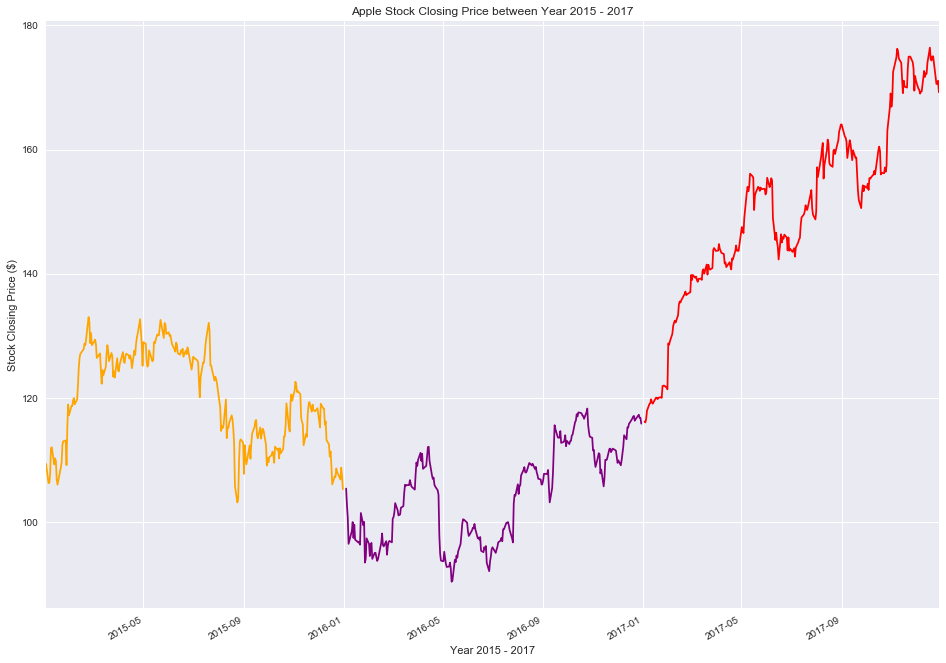

In [6]:
#### Component: multi_year.py

#Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import numpy as np
import matplotlib.dates as mdate
import datetime as dt

#Parse data
stock_pd = pd.read_csv("apple_raw.csv")
rsi_pd = pd.read_csv("apple_raw_rsi.csv")

#verify column datatypes
#print(stock_pd.dtypes)

stock_pd = pd.read_csv('apple_raw.csv',parse_dates=['timestamp'])
stock_pd = stock_pd.sort_values(by='timestamp')
stock_pd.drop(['open','high','low'],axis = 1, inplace = True)
stock_pd.set_index('timestamp',inplace=True)

#Multi-year color chart closing price (all three years)
stock_pd.truncate(before=str('2017-01-01'), after=str('2017-12-31'))['close'].plot(figsize=(16, 12), color="red")
stock_pd.truncate(before=str('2016-01-01'), after=str('2016-12-31'))['close'].plot(figsize=(16, 12), color="purple")
stock_pd.truncate(before=str('2015-01-01'), after=str('2015-12-31'))['close'].plot(figsize=(16, 12), color="orange")
plt.title("Apple Stock Closing Price between Year 2015 - 2017")
plt.xlabel("Year 2015 - 2017")
plt.ylabel("Stock Closing Price ($)")
plt.savefig('2015-2017 Apple close single chart.png')
plt.show()